In [28]:
%run BI_df.py
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

   #Branch Loans  #Calls  #Contacts  #Devices  #Expenditures  #Incoming Amts  \
0              1     182        246         1              8               1   
1              2    1423         88         1             16               7   
2              1     442        200         1              3               1   
3              1    1775        711         1              5               8   
4              4    2356        128         1             95              82   

   #MSHWARI Loans  #Texts  %Successful Transactions  Average TalkTime (mins)  \
0               0     133                 62.500000                 0.505879   
1               0    3773                 76.551724                 1.064708   
2               1     125                 73.584906                 0.420475   
3               1   10522                 75.392670                 1.145617   
4               0    1654                 83.255814                 0.563001   

    ...    Max MSHWARI Balance  Max MS

In [29]:
print(list(df))
print(len(list(df)))

['#Branch Loans', '#Calls', '#Contacts', '#Devices', '#Expenditures', '#Incoming Amts', '#MSHWARI Loans', '#Texts', '%Successful Transactions', 'Average TalkTime (mins)', 'Avg Branch Installment', 'Avg Branch Loan', 'Avg Expenditure', 'Avg Incoming Amt', 'Avg MPESA Balance', 'Avg MSHWARI Balance', 'Avg MSHWARI Loan', 'Burn Rate', 'Day/Night Call ratio', 'Day/Night Text ratio', 'MPESA Limit', 'MSHWARI Competition', 'Max Branch Loan', 'Max Expenditure', 'Max Incoming Amt', 'Max MPESA Balance', 'Max MSHWARI Balance', 'Max MSHWARI Loan', 'Min Branch Loan', 'Min Expenditure', 'Min Incoming Amt', 'Total Expenditure', 'Total Income', 'Total MSHWARI Loans', 'Total TalkTime (hrs)', 'status']
36


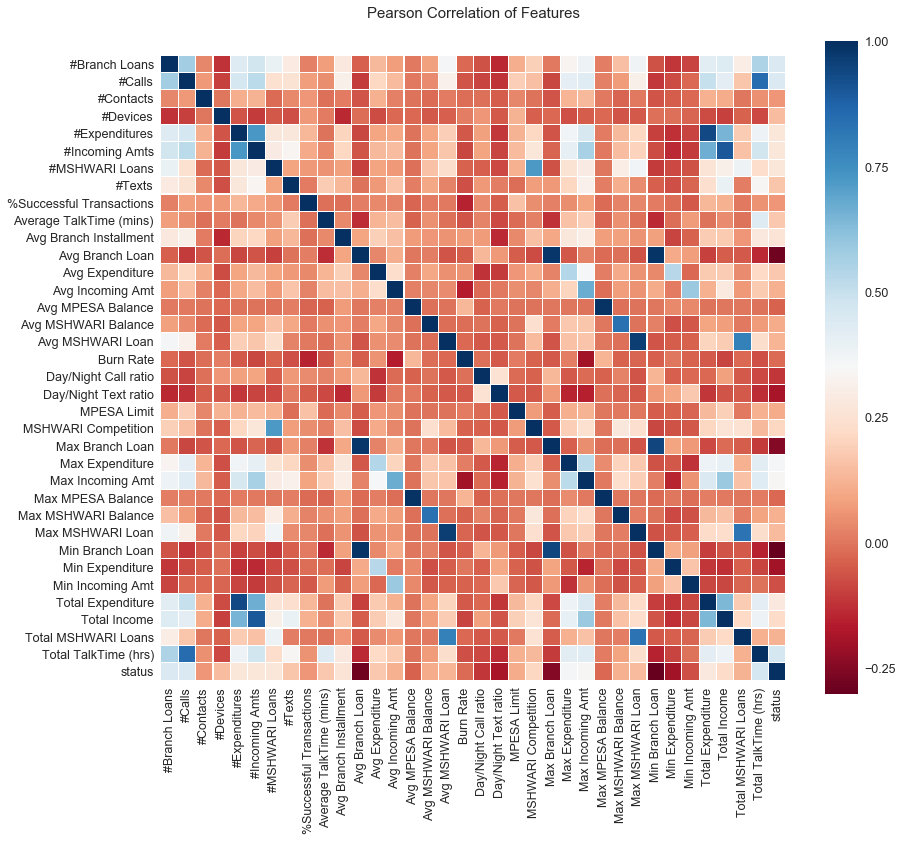

In [30]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
all_features = df.corr()
sns.heatmap(all_features.astype(float), linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=False)

# even and non-overlapping info content across the board. minimize collinearity.

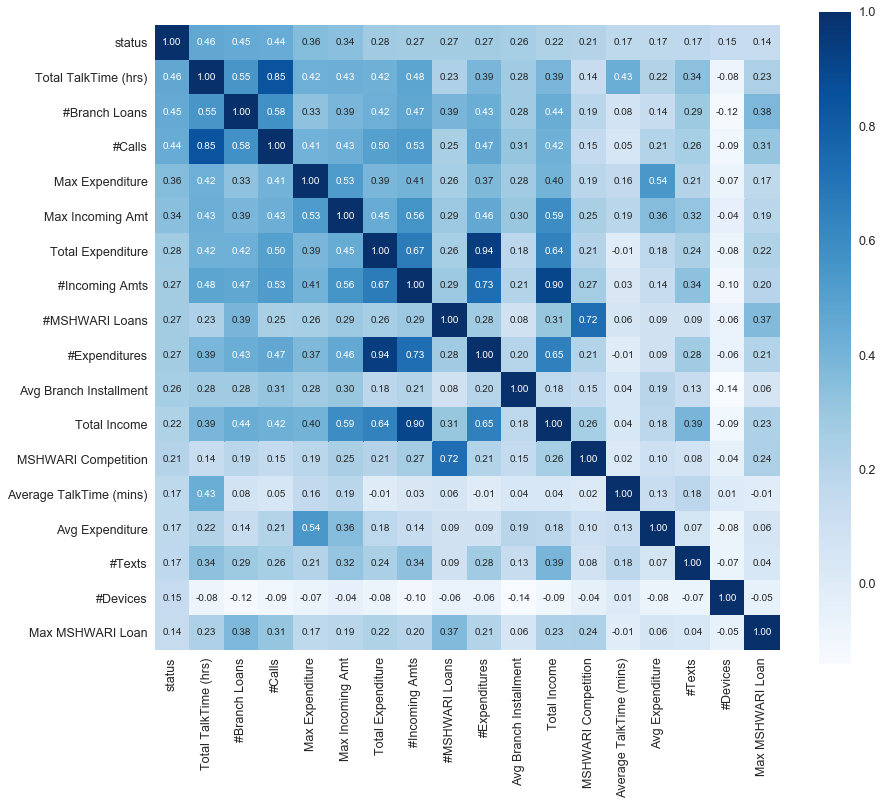

In [31]:
k = 18
plt.figure(figsize=(14,12))
cols = all_features.nlargest(k, 'status')['status'].index 
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Blues', annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#standouts. utility of bad standouts? nsmallest

/Users/yashevde/miniconda3/envs/pYash/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/yashevde/miniconda3/envs/pYash/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


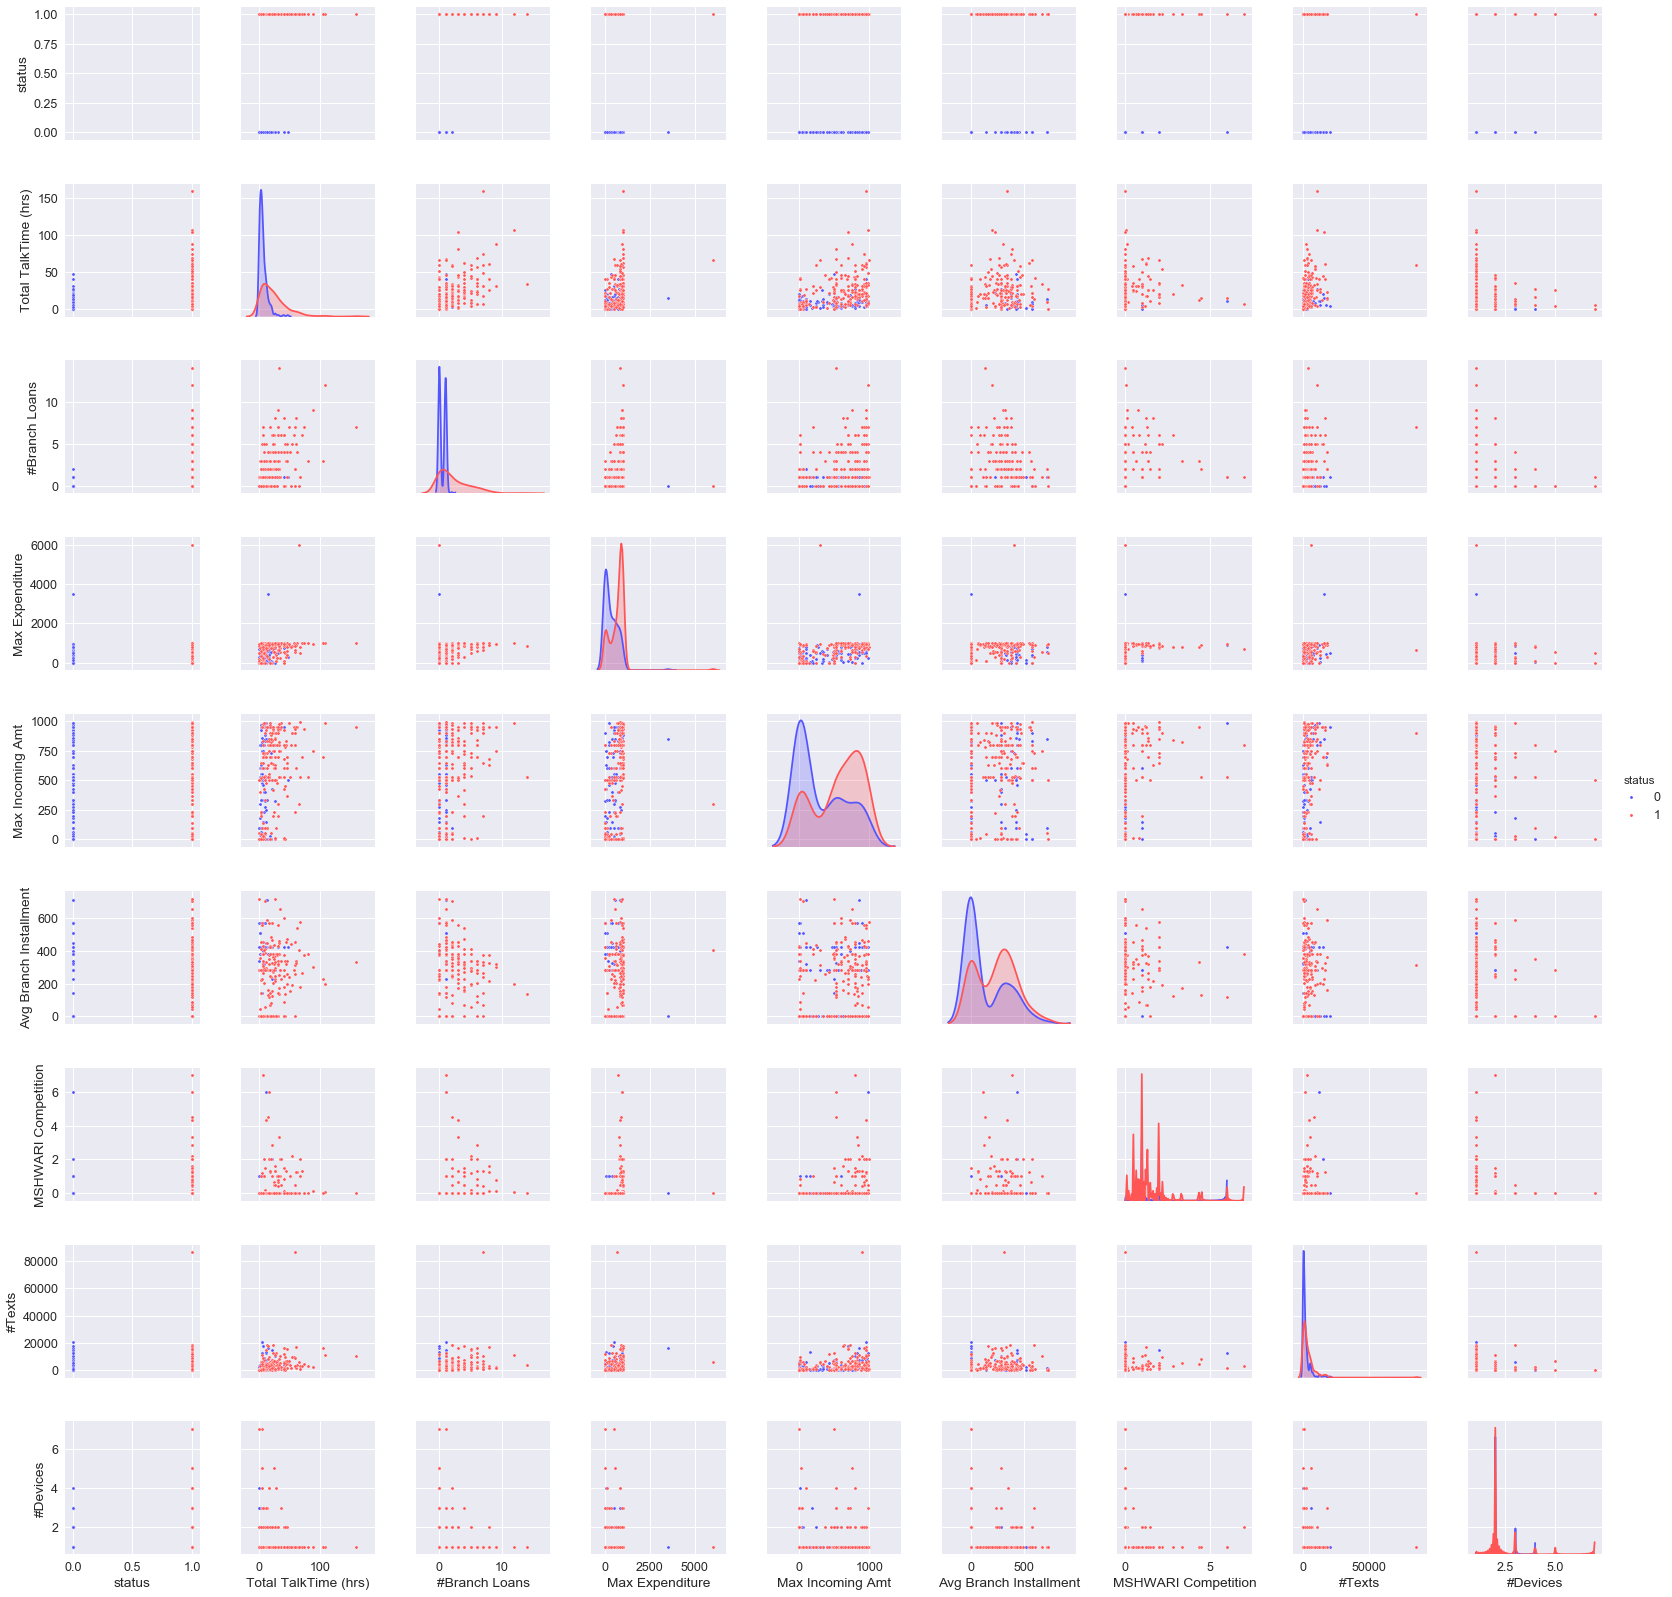

In [32]:
#minimizing collinearity with this selection of cols

pairs = ['status', 'Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
         'Avg Branch Installment', 'MSHWARI Competition', '#Texts','#Devices'] 
#'#Expenditures', '#Incoming Amts', '%Successful Transactions', 'Average TalkTime (mins)', 'Avg Branch Loan', 'Avg Expenditure', 'Avg Incoming Amt', 'Avg MPESA Balance', 'Avg MSHWARI Balance', 'Avg MSHWARI Loan', 'Burn Rate', 'Day/Night Call ratio', 'Day/Night Text ratio', 'MPESA Limit', 'Max Branch Loan', 'Max MPESA Balance', 'Max MSHWARI Balance', 'Max MSHWARI Loan', 'Min Branch Loan', 'Min Expenditure', 'Min Incoming Amt', 'Total Expenditure', 'Total Income', 'Total MSHWARI Loans', '#Contacts']
sns.pairplot(df[pairs], size=2.5, hue='status', palette = 'seismic',diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )

In [33]:
fields = ['Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
          'Avg Branch Installment', 'MSHWARI Competition', '#Texts','#Devices']
le = LabelEncoder()
for f in fields:
    df[f] = le.fit_transform(df[f])

In [34]:
def classification_model(model, data, predictors, target):

    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[target])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:

        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[target].iloc[train]
    
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[target].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    model.fit(data[predictors],data[target]) 

In [36]:
target = 'status'
model = DecisionTreeClassifier()
predictors = ['Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
          'Avg Branch Installment', 'MSHWARI Competition', '#Texts','#Devices']
classification_model(model, train, predictors, target)

#accuracy up, CV score down: overfitting

contribution = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(contribution)

Accuracy : 100.000%
Cross-Validation Score : 73.750%
#Branch Loans             0.326736
Total TalkTime (hrs)      0.220745
#Texts                    0.160324
Max Expenditure           0.138463
Max Incoming Amt          0.062265
#Devices                  0.047964
Avg Branch Installment    0.043504
MSHWARI Competition       0.000000
dtype: float64


In [37]:
target = 'status'
model = RandomForestClassifier()
predictors = ['Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
          'Avg Branch Installment', 'MSHWARI Competition', '#Texts','#Devices']
classification_model(model, train, predictors, target)

#still over fit. tune parameters, reduce n_predictors

contribution = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(contribution)

Accuracy : 98.125%
Cross-Validation Score : 79.375%
Total TalkTime (hrs)      0.233413
Max Expenditure           0.179869
#Branch Loans             0.178439
#Texts                    0.120742
Avg Branch Installment    0.109757
Max Incoming Amt          0.100460
#Devices                  0.052154
MSHWARI Competition       0.025166
dtype: float64


In [38]:
target = 'status'
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictors = ['Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
          'Avg Branch Installment', '#Texts']
classification_model(model, train, predictors, target)

#generalizing well. expected higher CV score

contribution = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(contribution)

Accuracy : 85.000%
Cross-Validation Score : 78.750%
Total TalkTime (hrs)      0.388759
#Branch Loans             0.182723
Max Expenditure           0.127812
Avg Branch Installment    0.127722
Max Incoming Amt          0.094224
#Texts                    0.078761
dtype: float64


In [ ]:
#SVM

In [ ]:
sns.distplot(df['branch_avg'])
print("Skewness: %f" % df['total_talkTime_hrs'].skew())
print("Kurtosis: %f" % df['total_talkTime_hrs'].kurt())

In [ ]:
sns.distplot(df['total_talkTime_hrs'])
print("Skewness: %f" % df['total_talkTime_hrs'].skew())
print("Kurtosis: %f" % df['total_talkTime_hrs'].kurt())

In [ ]:
train.boxplot(column='total_talkTime_hrs', by='n_devices')